In [433]:
#### Load Data
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df_train = pd.read_csv('file_price_house/train_clean.csv')
df_test = pd.read_csv('file_price_house/test_clean.csv')
 
df.head()
#df_test.head()
 

,Unnamed: 0,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,0,60,65.0,8450,7,5,2003,2003,196.0,706,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.185644
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.351485
2,2,60,68.0,11250,7,5,2001,2002,162.0,486,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.537129
3,3,70,60.0,9550,7,5,1915,1970,0.0,216,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.668317
4,4,60,84.0,14260,8,5,2000,2000,350.0,655,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.606436


In [434]:
#นำข้อมูลที่เกิดจากการ Clean column ที่ขึ้นต้นด้วย is_select_
#####################################################
import copy

IsSelect = [col for col in df_train.columns if 'is_select_'  in col] 
IsSelect.remove("is_select_SalePrice")

data_label_preict = df_train["SalePrice"]

d_train = df_train[IsSelect]
#d_train['SalePrice'] = df_train["SalePrice"]
d_test = df_test[IsSelect]
#d_test['SalePrice'] =  0
dataset = pd.concat(objs=[d_train, d_test], axis=0)

#data_train  = df_train[IsSelect] 
#data_test  = df_test[IsSelect]
testID = df_test['Id']

train_objs_num = len(data_train)
dataset = pd.get_dummies(dataset)
data_train = copy.copy(dataset[:train_objs_num])
data_test = copy.copy(dataset[train_objs_num:])
#data_test = data_test.drop(['SalePrice'],axis=1)
data_train.shape
data_test.shape

  
print('All Data Select for Test',dataset.shape) 
dataset.head()  

All Data Select for Test (2919, 37)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,1.000000,0.953734,1.0,0.951389,0.659349,0.493734,1.0,1.0,1.000000,0.981481,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.185644
1,0.833333,0.643216,1.0,0.798611,0.972078,0.877749,1.0,0.8,0.812500,0.481481,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.351485
2,1.000000,1.000000,1.0,1.000000,0.708646,0.554268,1.0,0.8,1.000000,0.962963,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.537129
3,1.000000,0.958586,1.0,1.000000,0.582322,0.593048,0.5,1.0,0.335938,0.370370,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.668317
4,1.000000,1.000000,1.0,1.000000,0.881956,0.767084,1.0,1.0,1.000000,0.925926,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.606436


In [435]:
print('All Data Select for Train',data_train.shape) 
data_train.head()

All Data Select for Train (1460, 37)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,1.000000,0.953734,1.0,0.951389,0.659349,0.493734,1.0,1.0,1.000000,0.981481,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.185644
1,0.833333,0.643216,1.0,0.798611,0.972078,0.877749,1.0,0.8,0.812500,0.481481,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.351485
2,1.000000,1.000000,1.0,1.000000,0.708646,0.554268,1.0,0.8,1.000000,0.962963,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.537129
3,1.000000,0.958586,1.0,1.000000,0.582322,0.593048,0.5,1.0,0.335938,0.370370,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.668317
4,1.000000,1.000000,1.0,1.000000,0.881956,0.767084,1.0,1.0,1.000000,0.925926,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.606436


In [436]:
print('All Data Select for Test',data_test.shape) 
data_test.head()

All Data Select for Test (1459, 37)


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
0,0.666667,0.372146,0.5,1.000000,0.676380,0.501281,0.5,0.50,0.672131,0.203704,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.338558
1,0.833333,0.701674,0.5,0.541667,1.000000,0.945156,0.5,0.75,0.647541,0.148148,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.509091
2,0.666667,0.929985,1.0,0.836806,0.711656,0.534085,1.0,0.75,0.967213,0.888889,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.171787
3,0.833333,0.910959,1.0,0.815972,0.710123,0.532035,1.0,1.00,0.975410,0.888889,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.406270
4,1.000000,0.664384,1.0,0.878472,0.981595,0.894926,1.0,0.50,0.926230,0.777778,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.000000


In [437]:
#Create train and test set
#########################

x_train, x_test, y_train, y_test = train_test_split(data_train, data_label_preict, test_size=0.3, random_state=1) 
 
#x_train.head()
print('Data Train :',x_train.shape)
#y_train.head()
print('Data Train For Predic : ',y_train.shape)
#x_test.head()
print('Data Test : ',x_test.shape)
#y_test.head()
print('Data Test For Predic',y_test.shape)



Data Train : (1022, 37)
Data Train For Predic :  (1022,)
Data Test :  (438, 37)
Data Test For Predic (438,)


In [438]:
# Start For k-nearest neighbors (KNN)
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


In [439]:
x_test.head()


,is_select_OverallQual,is_select_GrLivArea,is_select_GarageCars,is_select_GarageArea,is_select_TotalBsmtSF,is_select_1stFlrSF,is_select_FullBath,is_select_TotRmsAbvGrd,is_select_YearBuilt,is_select_YearRemodAdd,...,is_select_CentralAir_Y,is_select_MSZoning_RL,is_select_HouseStyle_2Story,is_select_Electrical_SBrkr,is_select_BsmtQual_Gd,is_select_GarageType_Attchd,is_select_PavedDrive_Y,is_select_BsmtFullBath,is_select_LotShape_IR1,is_select_BsmtUnfSF
258,1.000000,1.000000,1.0,0.979167,0.741768,0.594940,1.0,1.0,1.000000,0.944444,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.745050
267,0.666667,1.000000,0.5,0.416667,0.554593,0.679120,1.0,1.0,0.523438,0.870370,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.423267
288,0.666667,0.392306,0.5,0.486111,0.679376,0.535351,0.5,0.6,0.742188,0.314815,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.534653
649,0.500000,0.205164,0.0,0.000000,0.485269,0.279972,0.5,0.2,0.765625,0.370370,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
1233,0.666667,0.591925,1.0,0.921875,0.915078,0.807756,0.5,0.8,0.679688,0.166667,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.232673


In [440]:
# Loop 100 เพื่อหาค่า K ที่มี root mean squared error น้อยที่สุด เพื่อนำไปใช้ Predic
#######################################################################

from sklearn import metrics  
rmse_val = [] #to store rmse values for different k

K_min = 0
K_min_Value = 0.0
 
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    #accurency = metrics.accuracy_score(y_test, pred) 
    rmse_val.append(error) #store rmse values
    # print('RMSE value for k= ' , K , 'is:', error, ' : accurrancy = ',accurency)
    print('RMSE value for k= ' , K , 'is:', error)
     
    if(K_min_Value >  error or K == 1) : 
        K_min  = K
        K_min_Value = error
        

RMSE value for k=  1 is: 51869.150832762556
RMSE value for k=  2 is: 46298.857548406864
RMSE value for k=  3 is: 45278.47952577087
RMSE value for k=  4 is: 44899.787492313146
RMSE value for k=  5 is: 45156.66319253976
RMSE value for k=  6 is: 43955.039359669514
RMSE value for k=  7 is: 44561.242736240696
RMSE value for k=  8 is: 44634.69047193649
RMSE value for k=  9 is: 45160.21961930199
RMSE value for k=  10 is: 45498.70807549369
RMSE value for k=  11 is: 45802.127733347945
RMSE value for k=  12 is: 45187.329273820964
RMSE value for k=  13 is: 45343.447096115364
RMSE value for k=  14 is: 44857.226340722475
RMSE value for k=  15 is: 44474.88222773716
RMSE value for k=  16 is: 44854.90764461722
RMSE value for k=  17 is: 45044.60159334072
RMSE value for k=  18 is: 44795.2359245952
RMSE value for k=  19 is: 45062.36614762002
RMSE value for k=  20 is: 45227.317159242244
RMSE value for k=  21 is: 44794.65651980191
RMSE value for k=  22 is: 45105.09991585514
RMSE value for k=  23 is: 45472.

 Select RMSE : K = 43955.039359669514 , Min Value = 6 : 43955.039359669514


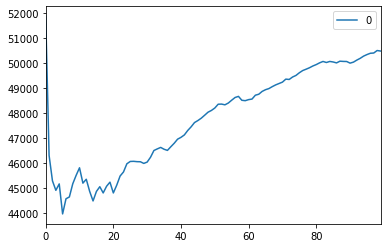

In [441]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
 
print(f" Select RMSE : K = {K_min_Value} , Min Value = {K_min} : {min(rmse_val)}")

In [442]:
##################################
## Model KNN 
###################################
import numpy as np
from sklearn import metrics 
K = K_min
model = neighbors.KNeighborsRegressor(n_neighbors = K)

model.fit(data_train, data_predict_column)  #fit the model
y_preds=model.predict(x_test) #make prediction on test set 
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds))) 
pred_knn=model.predict(data_test) 

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = pred_knn
sub.to_csv('file_price_house/submission_KNN.csv',index=False) 
sub.head()


Root Mean square error:  33345.884623728925


,Id,SalePrice
0,1461,117283.333333
1,1462,152266.666667
2,1463,185333.333333
3,1464,232666.666667
4,1465,183397.500000


In [443]:
##################################
## Model Linear Regression
###################################
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(data_train,data_predict_column)
y_preds = model.predict(x_test)
 
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds))) 
predict_linear = model.predict(data_test)    


sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict_linear
sub.to_csv('file_price_house/submission_Linear.csv',index=False) 
sub.head()
 


Root Mean square error:  41567.44157177281


,Id,SalePrice
0,1461,129783.509355
1,1462,180387.768336
2,1463,224813.900615
3,1464,248407.078456
4,1465,175458.004277


In [444]:
##################################
## Model Naive bay 
###################################
from sklearn import datasets 
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
 
model = GaussianNB()
model.fit(data_train,data_predict_column)
y_preds = model.predict(x_test)
 
print("Root Mean square error: " , np.sqrt(metrics.mean_squared_error(y_test,y_preds))) 
predict_nb= model.predict(data_test)    


sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = predict_nb
sub.to_csv('file_price_house/submission_NB.csv',index=False) 
sub.head()
 

Root Mean square error:  19779.660693979302


,Id,SalePrice
0,1461,117000.0
1,1462,120000.0
2,1463,192000.0
3,1464,200500.0
4,1465,153900.0
